<a href="https://colab.research.google.com/github/HarshithaRD05/Deep-Learning-Notebooks/blob/master/Copy_of_Building_a_Convolutional_Neural_Network_in_TensorFlow_2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stage 1: Installing dependencies and notebook gpu setup

## Stage 2: Importing dependencies for the project

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [0]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


### Image normalization

In [0]:
X_train = X_train / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

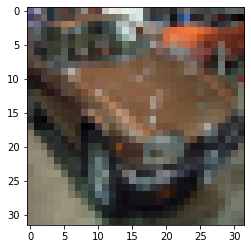

In [8]:
plt.imshow(X_test[2000])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid', strides = 2))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)         

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [37]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6540 - sparse_categorical_accuracy: 0.3798 - val_loss: 1.3275 - val_sparse_categorical_accuracy: 0.5082
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2619 - sparse_categorical_accuracy: 0.5456 - val_loss: 1.1758 - val_sparse_categorical_accuracy: 0.5802
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0807 - sparse_categorical_accuracy: 0.6187 - val_loss: 1.0024 - val_sparse_categorical_accuracy: 0.6432
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9499 - sparse_categorical_accuracy: 0.6658 - val_loss: 0.9794 - val_sparse_categorical_accuracy: 0.6606
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8611 - sparse_categorical_accuracy: 0.7002 - val_loss: 0.8581 - val_sparse_categorical_accuracy: 0.7038
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7872 - spars

### Model evaluation and prediction

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8645 - sparse_categorical_accuracy: 0.7151


In [39]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7150999903678894
